<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1,A2,A3

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("/content/Lab Session Data.xlsx", usecols=['Customer','Candies (#)','Mangoes (Kg)','Milk Packets (#)','Payment (Rs)'])
print("Contents in csv file:\n", df)
A=np.array([df['Candies (#)'],df['Mangoes (Kg)'],df['Milk Packets (#)']]).transpose()
print(A)
C=np.array([df['Payment (Rs)']]).transpose()
print(C)
print("Dimensionality",A.shape[1])
print("Number of vectors",A.shape[0])
print("Rank",np.linalg.matrix_rank(A))
print("Cost",np.matmul(np.linalg.pinv(A),C))
def classifier(C):
  payment=df.groupby('Customer')['Payment (Rs)'].sum()
  classify=payment.apply(lambda x:'Rich' if x>200 else 'Poor')
  return classify
classifier(C)

Contents in csv file:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality 

,Payment (Rs)
Customer,
C_1,Rich
C_10,Poor
C_2,Rich
C_3,Rich
C_4,Poor
C_5,Rich
C_6,Poor
C_7,Rich
C_8,Rich


A4





Contents in csv file:
              Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.002

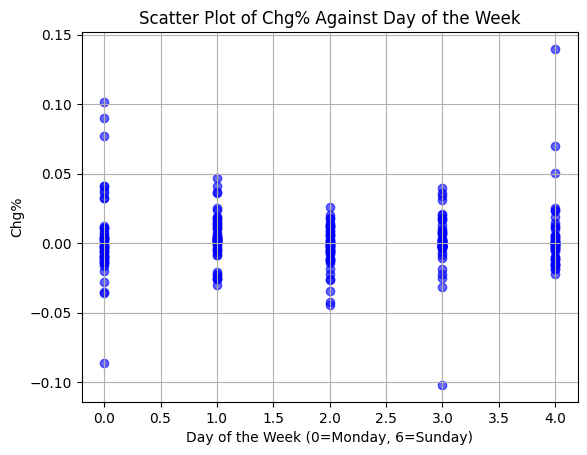

In [16]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name='IRCTC Stock Price',usecols=['Date','Month','Day','Price','Open','High','Low','Volume','Chg%'])
print("Contents in csv file:\n", df)
print("Mean",statistics.mean(df['Price']))
print("Varience",statistics.variance(df['Price']))
def wednesday(df):
  wed=df[df['Day']=='Wed']
  wed_mean=statistics.mean(wed['Price'])
  pop_mean=statistics.mean(df['Price'])
  return wed_mean,pop_mean,abs(wed_mean-pop_mean)
print(wednesday(df))
def april(df):
  april=df[df['Month']=='Apr']
  april_mean=statistics.mean(april['Price'])
  ap_pop_mean=statistics.mean(df['Price'])
  return april_mean,ap_pop_mean,abs(april_mean-ap_pop_mean)
print(april(df))
loss_probability=sum(df['Chg%'].apply(lambda x: x < 0))/len(df)
print("Loss Probability:",loss_probability)
def profit_wednesday(df):
  profit_wednesdays=sum(df[(df['Day']=='Wed')]['Chg%'].apply(lambda x: x > 0))
  total_wednesdays=len(df[df['Day']=='Wed'])
  profit_probability_wednesday = profit_wednesdays / total_wednesdays
  print(profit_probability_wednesday)
profit_wednesday(df)
def conditional_probability(df):
  total_days=len(df)
  profit_wednesdays=sum(df[(df['Day']=='Wed')]['Chg%'].apply(lambda x: x > 0))
  total_profit_days = sum(df['Chg%'].apply(lambda x: x > 0))
  total_wednesday_days = len(df[df['Day'] == 'Wed'])
  profit_given_wednesday = profit_wednesdays / total_wednesday_days
  print(profit_given_wednesday)
conditional_probability(df)
df['Date'] = pd.to_datetime(df['Date'])
df['DayNum'] = df['Date'].dt.weekday
plt.scatter(df['DayNum'], df['Chg%'], alpha=0.6, color='blue')
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% Against Day of the Week")
plt.grid(True)
plt.show()

A5

In [23]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
print(df.dtypes)
categorical=df.select_dtypes(include=['object']).columns
df[categorical]=df[categorical].apply(lambda x: pd.factorize(x)[0])
print(df.describe())
print("Missing values:\n",df.isnull().sum())
Q1,Q3=np.percentile(df.select_dtypes(include=[np.number]),[25, 75],axis=0)
IQR=Q3-Q1
print("Outliers per column:\n",((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
print("Mean:\n", df.mean(),"\nVariance:\n", df.var())



Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

A6

In [27]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate IQR for numeric columns
Q1, Q3 = df[numeric_cols].quantile(0.25), df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Impute missing values:
for col in numeric_cols:
    if outliers[col].any():  # If outliers exist, use median
        df[col].fillna(df[col].median(), inplace=True)
    else:  # Otherwise, use mean
        df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values in categorical columns using mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Save the modified dataset as a new Excel file
df.to_excel("Modified_Thyroid_Data.xlsx", index=False)

print("Data imputation complete. Modified file saved as 'Modified_Thyroid_Data.xlsx'.")


<ipython-input-27-c5075ef0b105>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-27-c5075ef0b105>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Data imputation complete. Modified file saved as 'Modified_Thyroid_Data.xlsx'.


A10

<ipython-input-29-c1c114e68bdc>:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


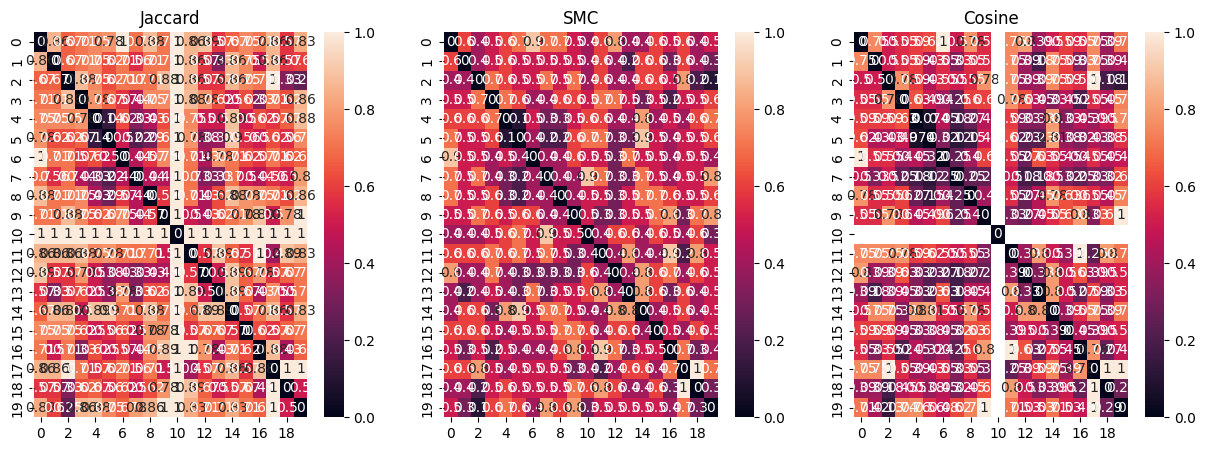

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
def jaccard_coefficient(x, y):
    intersection=np.logical_and(x, y).sum()
    union=np.logical_or(x, y).sum()
    return intersection / union if union != 0 else 0
def simple_matching_coefficient(x, y):
    matches=(x==y).sum()
    return matches / len(x)
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
data=np.random.randint(0, 2, (20, 10))
jc_matrix=squareform(pdist(data,metric=lambda u, v: 1 - jaccard_coefficient(u, v)))
smc_matrix=squareform(pdist(data,metric=lambda u, v: 1 - simple_matching_coefficient(u, v)))
cos_matrix=squareform(pdist(data,metric=lambda u, v: 1 - cosine_similarity(u, v)))
fig,axes=plt.subplots(1,3,figsize=(15, 5))
for ax,matrix,title in zip(axes, [jc_matrix, smc_matrix, cos_matrix], ["Jaccard", "SMC", "Cosine"]):
    sns.heatmap(matrix, annot=True, ax=ax)
    ax.set_title(title)
plt.show()